In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import scipy
import statsmodels
import pingouin
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import spearmanr
from scipy.integrate import quad

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.colors as cs
import matplotlib.cbook as cbook
from matplotlib import cm

# Machine Learning - Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
#from minisom import MiniSom
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import auc

# Machine Learning - Metrics and Utilities
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler

# Signal Processing and Analysis
import scipy.signal
#from scikit_posthocs import posthoc_conover

# Miscellaneous
#import sklearn_extensions
#from mpl_toolkits import mplot3d
from joblib import Parallel, delayed
import mat73
from tabulate import tabulate
import eeg_routines
from eeg_routines import parcellation
import warnings
from datetime import datetime
import pickle
from tqdm.notebook import tqdm

from statannotations.Annotator import Annotator

times = np.linspace(-300, 1000, 563)
expectation = np.logical_and(times > -300, times < 0)
encoding = np.logical_and(times > 0, times < 200)
decision = np.logical_and(times > 200, times < 600)
postdecision = np.logical_and(times > 600, times < 1000)
decision_postdecision = np.logical_and(times > 200, times < 1000)

In [6]:
import data_preprocessing
import outliers
import ERP_feature_extraction
import ERP_plot
import posthoc

 #### $\color{grey}{\textsf{Dataset}}$

In [3]:
from data_preprocessing import data_dictionary

erpData=data_preprocessing.data_dictionary()

 #### $\color{grey}{\textsf{ERPs statistical analysis, t windows and features extraction}}$

In [4]:
from ERP_feature_extraction import p_times_windows_msec_bonf

In [5]:
#OCCIPITAL CHANNELS - FEMALES 
p_GROUPF_OCC_msec_bonf,p_corrected_GROUPF_OCC_msec_bonf,effect_size_GROUPF_OCC,df_p_posthoc_GROUPF_OCC_msec_bonf,min_values_GROUPF_OCC_msec_bonf,max_values_GROUPF_OCC_msec_bonf,df_GROUPF_OCC_msec_bonf= ERP_feature_extraction.p_times_windows_msec_bonf(parcel='Q10',
                                                                                                                                                            dictionary='GROUPS-FEMALES',
                                                                                                                                                            posthoc=True,
                                                                                                                                                            n_clusters=3)

Significative temporal windows in GROUPS-FEMALES for the electrode cluster Q10

For n_clusters = 3:
-------------posthoc with cluster label 0------with tmin 69.4736842105263 and tmax 83.15789473684208------and len 8
HSvsSCD: 0 of 8 | 0.0 | avg p=nan
HSvsMCI: 0 of 8 | 0.0 | avg p=nan
SCDvsMCI: 8 of 8 | 1.0 | avg p=0.0005
Temporal window label: 0 --- Sub-group: HS 
Temporal window label: 0 --- Sub-group: SCD 
Temporal window label: 0 --- Sub-group: MCI 
-------------posthoc with cluster label 1------with tmin 865.1127819548872 and tmax 945.2631578947369------and len 9
HSvsSCD: 6 of 9 | 0.6666666666666666 | avg p=0.00518
HSvsMCI: 0 of 9 | 0.0 | avg p=nan
SCDvsMCI: 0 of 9 | 0.0 | avg p=nan
Temporal window label: 1 --- Sub-group: HS 
Temporal window label: 1 --- Sub-group: SCD 
Temporal window label: 1 --- Sub-group: MCI 
-------------posthoc with cluster label 2------with tmin 98.796992481203 and tmax 132.03007518796989------and len 18
HSvsSCD: 17 of 18 | 0.9444444444444444 | avg p=0.00065

In [7]:
#CENTRAL CHANNELS - FEMALES

p_GROUPF_CEN_msec_bonf,p_corrected_GROUPF_CEN_msec_bonf,effect_size_GROUPF_OCC,df_p_posthoc_GROUPF_CEN_msec_bonf,min_values_GROUPF_CEN_msec_bonf,max_values_GROUPF_CEN_msec_bonf,df_GROUPF_CEN_msec_bonf= ERP_feature_extraction.p_times_windows_msec_bonf(parcel='Q5',
                                                                                                                                                            dictionary='GROUPS-FEMALES',
                                                                                                                                                            posthoc=True,
                                                                                                                                                            n_clusters=3)

Significative temporal windows in GROUPS-FEMALES for the electrode cluster Q5

For n_clusters = 3:
-------------posthoc with cluster label 0------with tmin 839.6992481203006 and tmax 1000.0------and len 83
HSvsSCD: 83 of 83 | 1.0 | avg p=0.00016
HSvsMCI: 74 of 83 | 0.891566265060241 | avg p=0.00021
SCDvsMCI: 0 of 83 | 0.0 | avg p=nan
Temporal window label: 0 --- Sub-group: HS 
Temporal window label: 0 --- Sub-group: SCD 
Temporal window label: 0 --- Sub-group: MCI 
-------------posthoc with cluster label 1------with tmin 73.38345864661653 and tmax 128.12030075187965------and len 25
HSvsSCD: 14 of 25 | 0.56 | avg p=0.00029
HSvsMCI: 13 of 25 | 0.52 | avg p=0.00154
SCDvsMCI: 8 of 25 | 0.32 | avg p=0.00232
Temporal window label: 1 --- Sub-group: HS 
Temporal window label: 1 --- Sub-group: SCD 
Temporal window label: 1 --- Sub-group: MCI 
-------------posthoc with cluster label 2------with tmin 610.9774436090225 and tmax 837.7443609022555------and len 73
HSvsSCD: 51 of 73 | 0.69863013698630

In [8]:
#OCCIITAL CHANNELS  MALES
p_GROUPM_OCC_msec_bonf,p_corrected_GROUPM_OCC_msec_bonf,effect_size_GROUPM_OCC,df_p_posthoc_GROUPM_OCC_msec_bonf,min_values_GROUPM_OCC_msec_bonf,max_values_GROUPM_OCC_msec_bonf,df_GROUPM_OCC_msec_bonf= ERP_feature_extraction.p_times_windows_msec_bonf(parcel='Q10',
                                                                                                                                                            dictionary='GROUPS-MALES',
                                                                                                                                                            posthoc=True,
                                                                                                                                                            n_clusters=5)

Significative temporal windows in GROUPS-MALES for the electrode cluster Q10

For n_clusters = 5:
-------------posthoc with cluster label 0------with tmin 120.30075187969925 and tmax 157.44360902255636------and len 20
HSvsSCD: 15 of 20 | 0.75 | avg p=0.00094
HSvsMCI: 0 of 20 | 0.0 | avg p=nan
SCDvsMCI: 20 of 20 | 1.0 | avg p=0.00057
Temporal window label: 0 --- Sub-group: HS 
Temporal window label: 0 --- Sub-group: SCD 
Temporal window label: 0 --- Sub-group: MCI 
-------------posthoc with cluster label 1------with tmin 526.9172932330827 and tmax 552.3308270676691------and len 13
HSvsSCD: 0 of 13 | 0.0 | avg p=nan
HSvsMCI: 0 of 13 | 0.0 | avg p=nan
SCDvsMCI: 5 of 13 | 0.38461538461538464 | avg p=0.00672
Temporal window label: 1 --- Sub-group: HS 
Temporal window label: 1 --- Sub-group: SCD 
Temporal window label: 1 --- Sub-group: MCI 
-------------posthoc with cluster label 2------with tmin 57.74436090225561 and tmax 75.33834586466162------and len 10
HSvsSCD: 10 of 10 | 1.0 | avg p=0.0

In [9]:
#CENTRAL CHANNELS - MALES

p_GROUPM_CEN_msec_bonf,p_corrected_GROUPM_CEN_msec_bonf,effect_size_GROUPM_OCC,df_p_posthoc_GROUPM_CEN_msec_bonf,min_values_GROUPM_CEN_msec_bonf,max_values_GROUPF_CEN_msec_bonf,df_GROUPM_CEN_msec_bonf= ERP_feature_extraction.p_times_windows_msec_bonf(parcel='Q5',
                                                                                                                                                            dictionary='GROUPS-MALES',
                                                                                                                                                            posthoc=True,
                                                                                                                                                            n_clusters=3)

Significative temporal windows in GROUPS-MALES for the electrode cluster Q5

For n_clusters = 3:
-------------posthoc with cluster label 0------with tmin 481.9548872180451 and tmax 562.1052631578947------and len 42
HSvsSCD: 42 of 42 | 1.0 | avg p=0.00045
HSvsMCI: 0 of 42 | 0.0 | avg p=nan
SCDvsMCI: 0 of 42 | 0.0 | avg p=nan
Temporal window label: 0 --- Sub-group: HS 
Temporal window label: 0 --- Sub-group: SCD 
Temporal window label: 0 --- Sub-group: MCI 
-------------posthoc with cluster label 1------with tmin 151.57894736842104 and tmax 204.36090225563908------and len 28
HSvsSCD: 26 of 28 | 0.9285714285714286 | avg p=0.00057
HSvsMCI: 13 of 28 | 0.4642857142857143 | avg p=0.00455
SCDvsMCI: 0 of 28 | 0.0 | avg p=nan
Temporal window label: 1 --- Sub-group: HS 
Temporal window label: 1 --- Sub-group: SCD 
Temporal window label: 1 --- Sub-group: MCI 
-------------posthoc with cluster label 2------with tmin 3.0075187969924855 and tmax 32.330827067669134------and len 3
HSvsSCD: 0 of 3 | 0.0

### $\color{grey}{\textsf{Outlier detection}}$

In [10]:
from outliers import out_detection
#Used: z_score=2

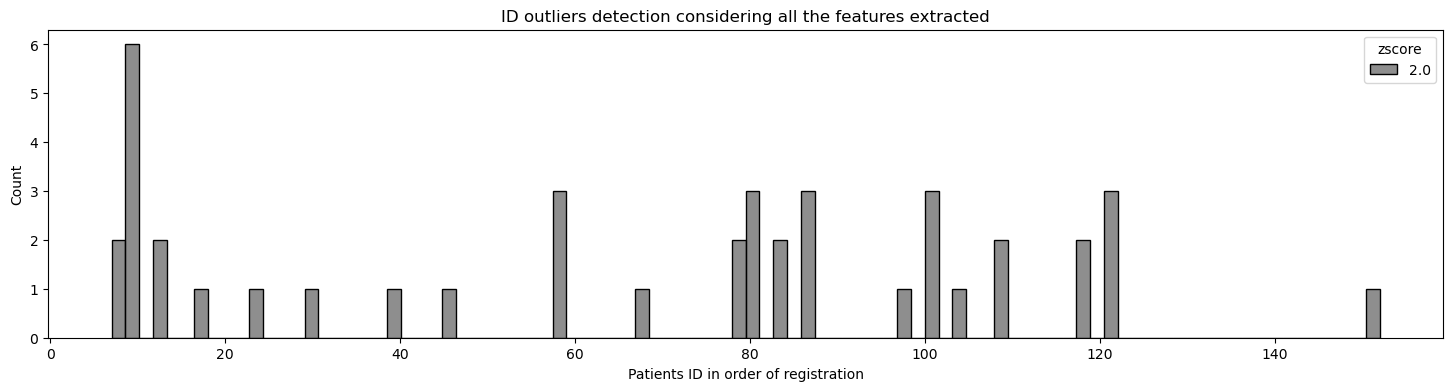

In [11]:
#OCCIPITAL CHANNELS - FEMALES
df_GROUPF_OCC_filt,df_nan_GROUPF_OCC= outliers.out_detection(df=df_GROUPF_OCC_msec_bonf,thr=[2],feature=['max feat','min feat','integral feat'])


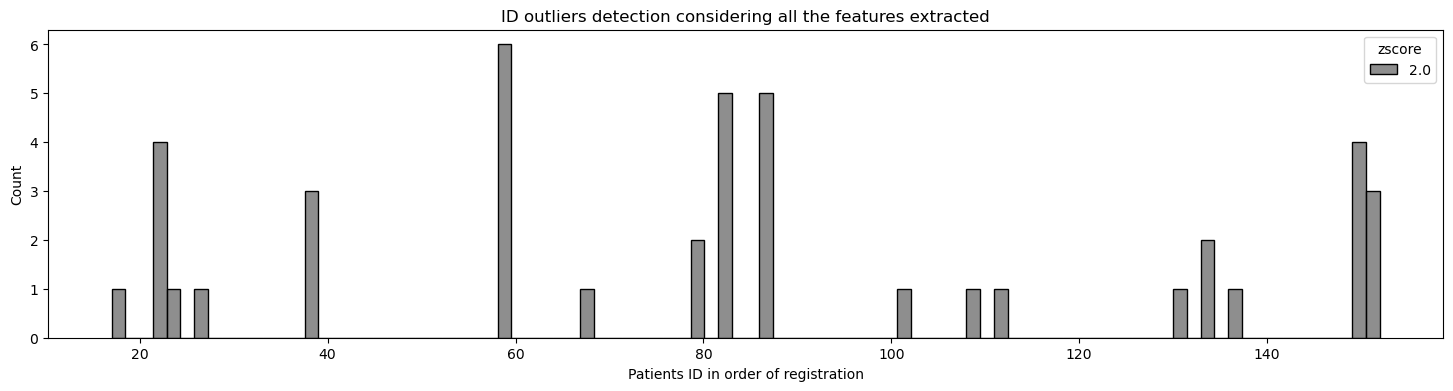

In [12]:
#CENTRAL CHANNELS - FEMALES
df_GROUPF_CEN_filt,df_nan_GROUPF_CEN= outliers.out_detection(df=df_GROUPF_CEN_msec_bonf,thr=[2],feature=['max feat','min feat','integral feat'])

In [13]:
from outliers import out_feature

df_nan_GROUPF = outliers.out_feature(P1_OCC=0,N1_OCC=2,P2_CEN=2,df_OCC=df_nan_GROUPF_OCC,df_CEN=df_nan_GROUPF_CEN)

In [14]:
df_nan_GROUPF

,ID_reg,ID_withincat,category,sex,age_cont,age_cat,electrode,t_window,t_min,t_max,max feat,min feat,integral feat,zscore,max feat_outlier,min feat_outlier,integral feat_outlier
0,10,2,SCD,F,57,OLDMINUS,Q10,0,69.473684,83.157895,9.963225,8.044956,128.395440,2.0,NaN,0.000000,NaN
1,78,29,SCD,F,78,OLDPLUS,Q10,0,69.473684,83.157895,7.583555,4.594592,88.210093,2.0,NaN,4.594592,NaN
2,80,30,SCD,F,56,OLDMINUS,Q10,0,69.473684,83.157895,11.396807,9.449857,149.319408,2.0,NaN,0.000000,NaN
3,59,11,MCI,F,74,OLDPLUS,Q10,0,69.473684,83.157895,7.162066,3.076603,74.566396,2.0,NaN,3.076603,NaN
4,101,20,MCI,F,81,OLDPLUS,Q10,0,69.473684,83.157895,6.943700,5.561699,89.687778,2.0,NaN,0.000000,NaN
5,12,3,SCD,F,52,OLDMINUS,Q10,2,98.796992,132.030075,-6.814505,-9.224732,289.583369,2.0,0.000000,-9.224732,NaN
6,45,17,SCD,F,58,OLDMINUS,Q10,2,98.796992,132.030075,-4.200991,-9.899089,281.053669,2.0,-4.200991,-9.899089,NaN
7,83,31,SCD,F,74,OLDPLUS,Q10,2,98.796992,132.030075,-5.355749,-13.018532,362.117116,2.0,-5.355749,NaN,NaN
8,7,1,MCI,F,75,OLDPLUS,Q10,2,98.796992,132.030075,-6.323636,-7.285135,233.142231,2.0,0.000000,-7.285135,NaN
9,59,11,MCI,F,74,OLDPLUS,Q10,2,98.796992,132.030075,3.262463,-10.061543,202.641928,2.0,3.262463,NaN,202.641928


$\color{pink}{\textsf{Identified outliers for FEMALES: 59,83}}$

**Outlier defined as an individual for whom at least two extracted variables have a z_score>2**

In [15]:
from outliers import out_removal

df_GROUPF_OCC_filt,df_GROUPF_CEN_filt = outliers.out_removal(outliers=[59,83],df_OCC_filt=df_GROUPF_OCC_filt,df_CEN_filt=df_GROUPF_CEN_filt)

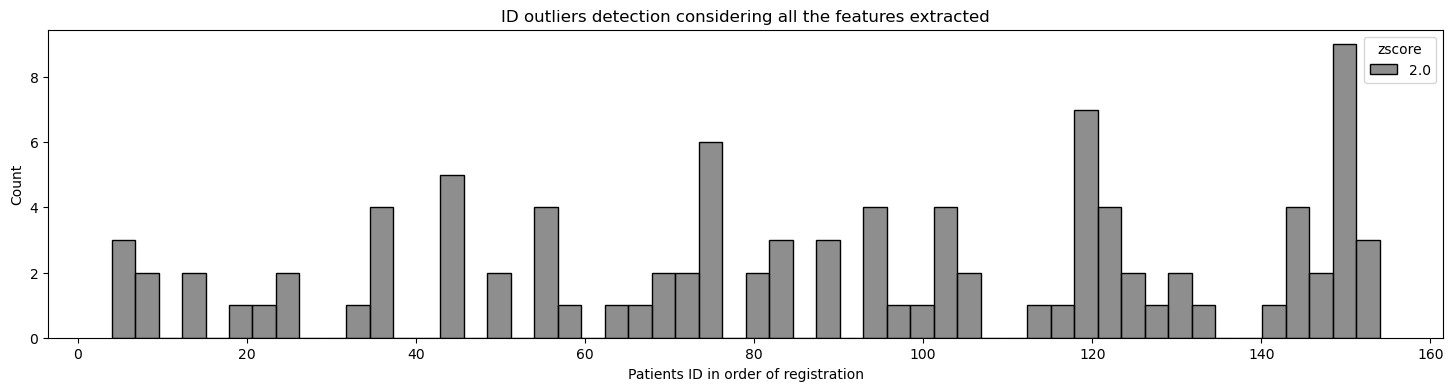

In [16]:
#OCCIPITAL CHANNELS - MALES
df_GROUPM_OCC_filt,df_nan_GROUPM_OCC= outliers.out_detection(df=df_GROUPM_OCC_msec_bonf,thr=[2],feature=['max feat','min feat','integral feat'])


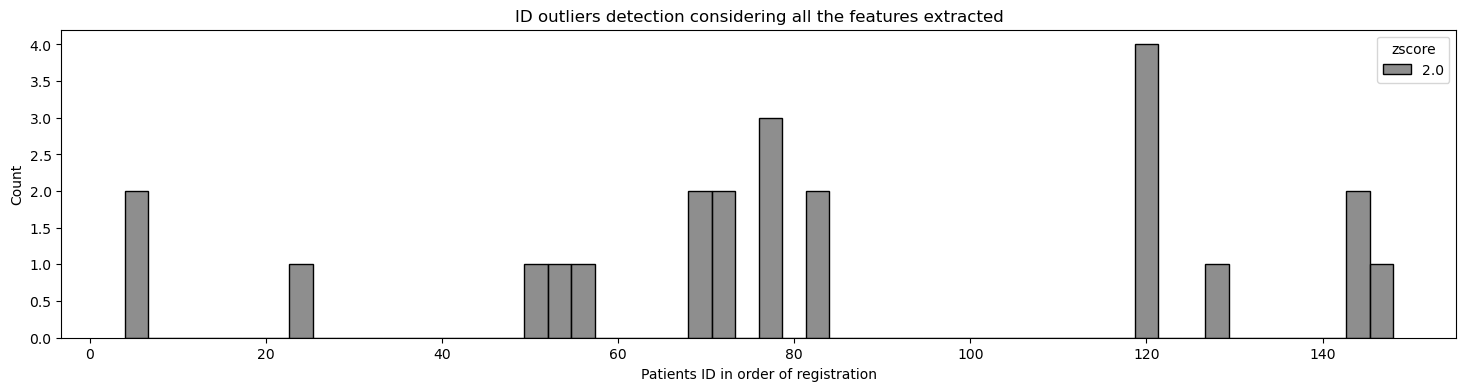

In [17]:
#CENTRAL CHANNELS - FEMALES
df_GROUPM_CEN_filt,df_nan_GROUPM_CEN= outliers.out_detection(df=df_GROUPM_CEN_msec_bonf,thr=[2],feature=['max feat','min feat','integral feat'])

In [18]:
df_nan_GROUPM = outliers.out_feature(P1_OCC=2,N1_OCC=0,P2_CEN=0,df_OCC=df_nan_GROUPM_OCC,df_CEN=df_nan_GROUPM_CEN)
df_nan_GROUPM

,ID_reg,ID_withincat,category,sex,age_cont,age_cat,electrode,t_window,t_min,t_max,max feat,min feat,integral feat,zscore,max feat_outlier,min feat_outlier,integral feat_outlier
0,103,6,HS,M,72,OLDPLUS,Q10,2,57.744361,75.338346,3.980258,1.404994,53.802906,2.0,NaN,1.404994,NaN
1,4,0,SCD,M,76,OLDPLUS,Q10,2,57.744361,75.338346,2.147326,-7.694710,51.780341,2.0,2.147326,0.000000,NaN
2,151,25,SCD,M,55,OLDMINUS,Q10,2,57.744361,75.338346,4.931808,0.971833,46.864018,2.0,NaN,0.971833,NaN
3,94,12,SCD,M,79,OLDPLUS,Q10,0,120.300752,157.443609,-5.387610,-7.229582,252.814142,2.0,0.000000,-7.229582,NaN
4,151,25,SCD,M,55,OLDMINUS,Q10,0,120.300752,157.443609,3.237537,-10.630534,191.125440,2.0,3.237537,NaN,191.12544
5,76,12,MCI,M,81,OLDPLUS,Q10,0,120.300752,157.443609,-4.947817,-16.550875,476.598395,2.0,-4.947817,NaN,NaN
6,119,13,SCD,M,68,OLDPLUS,Q5,0,481.954887,562.105263,4.723610,4.041446,351.821937,2.0,0.000000,0.000000,NaN
7,76,12,MCI,M,81,OLDPLUS,Q5,0,481.954887,562.105263,5.139559,3.788316,343.989240,2.0,0.000000,0.000000,NaN


$\color{lightblue}{\textsf{Identified outliers for MALES: 76,151}}$

In [19]:
df_GROUPM_OCC_filt,df_GROUPM_CEN_filt = outliers.out_removal(outliers=[76,151],df_OCC_filt=df_GROUPM_OCC_filt,df_CEN_filt=df_GROUPM_CEN_filt)

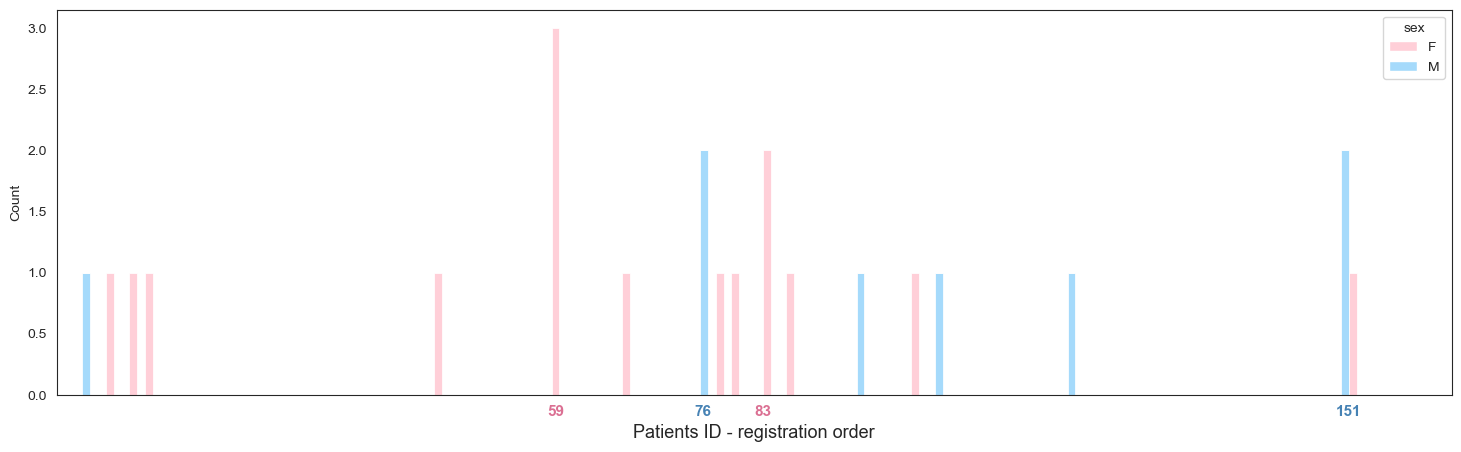

In [20]:
#Code to plot histogram to insert in the poster:
#This requires to run the code above also for MALES
result_nan=pd.concat([df_nan_GROUPF,df_nan_GROUPM])
palette_sex=['pink','lightskyblue']
sns.set_style("white")
fig,ax=plt.subplots(figsize=[18,5])
ax = sns.histplot(data=result_nan,hue='sex',x="ID_reg",bins=163,multiple="stack",palette=palette_sex)
ax.set_xlabel('Patients ID - registration order',fontsize=13)
ax.set_xlim(1,163) #163 = max(df_GROUP_CEN_msec_bonf['ID_reg'])
ax.set_xticks([59,76,83,151])

colors = ['palevioletred', 'steelblue', 'palevioletred','steelblue']
for xtick, color in zip(ax.get_xticklabels(), colors):
    xtick.set_color(color)

plt.xticks(fontweight='bold',fontsize=11)
plt.savefig('histogram.svg',dpi=400)

### $\color{grey}{\textsf{(Filtered) ERPs visualization}}$

  0%|          | 0/3 [00:00<?, ?it/s]

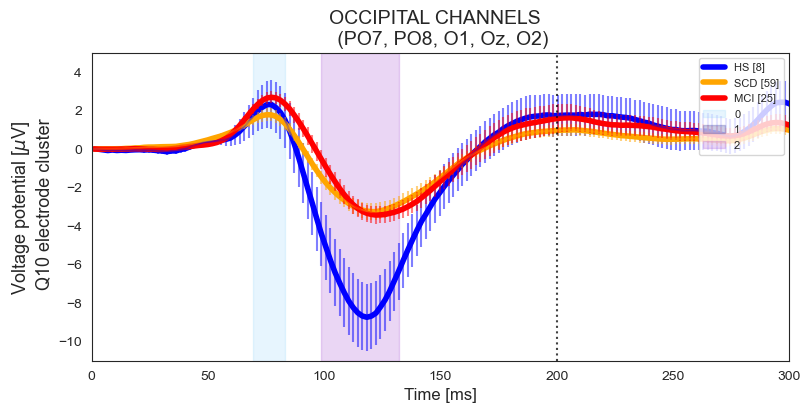

In [21]:
from ERP_plot import p_plot_msec

p_plot_msec (dictionary='GROUPS-FEMALES',
        parcel='Q10',
        alpha_eb = 0.5,
        xlim=[0,300],#now focus on encoding
        ylim=[-11,5],
        FONTSIZE = 16,
        min_values=min_values_GROUPF_OCC_msec_bonf,
        max_values=max_values_GROUPF_OCC_msec_bonf,
        nan_withincat=[[],[83],[59]],
        zscore=2)

### $\color{grey}{\textsf{Post-hoc ERPs p-values visualization}}$

In [22]:
from posthoc import post_hoc_plot

Text(0.5, 1.0, 'GROUPS FEMALES\n P1 t_window \n Occipital channels')

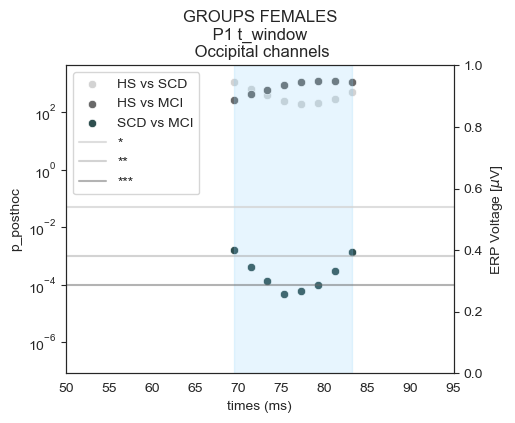

In [23]:
posthoc.post_hoc_plot(df_p_posthoc=df_p_posthoc_GROUPF_OCC_msec_bonf,
                           min_values=min_values_GROUPF_OCC_msec_bonf,
                           max_values=max_values_GROUPF_OCC_msec_bonf,
                           xlim=[50,95])
plt.title('GROUPS FEMALES\n P1 t_window \n Occipital channels',fontsize=12)

Text(0.5, 1.0, 'GROUPS FEMALES\n N1 t_window \n Occipital channels')

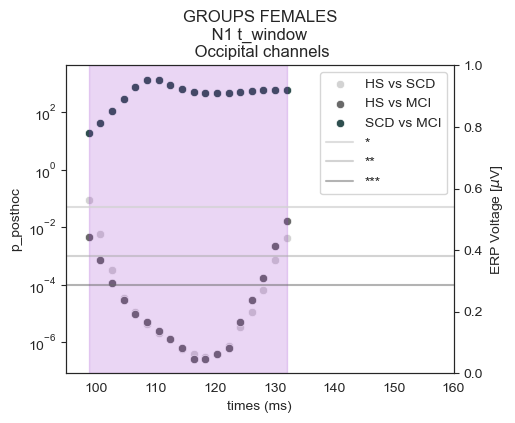

In [24]:
posthoc.post_hoc_plot(df_p_posthoc=df_p_posthoc_GROUPF_OCC_msec_bonf,
                           min_values=min_values_GROUPF_OCC_msec_bonf,
                           max_values=max_values_GROUPF_OCC_msec_bonf,
                           xlim=[95,160])
plt.title('GROUPS FEMALES\n N1 t_window \n Occipital channels',fontsize=12)


 $\color{orange}{\textsf{The last 2 steps: statistics on features and SHAP are not implemented as functions since very heterogenous}}$

The code below represents an example of the analysis

### $\color{grey}{\textsf{Statistical analysis on extracted features}}$

HS vs. SCD: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.462e-02 U_stat=9.300e+01
HS vs. MCI: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:7.266e-03 U_stat=2.900e+01
HS vs. SCD: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.496e-02 U_stat=5.800e+01
SCD vs. MCI: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:6.378e-03 U_stat=3.090e+02


Text(0.5, 0.98, 'OCCIPITAL CHANNELS - N1 min peak feature - FEMALES/MALES ')

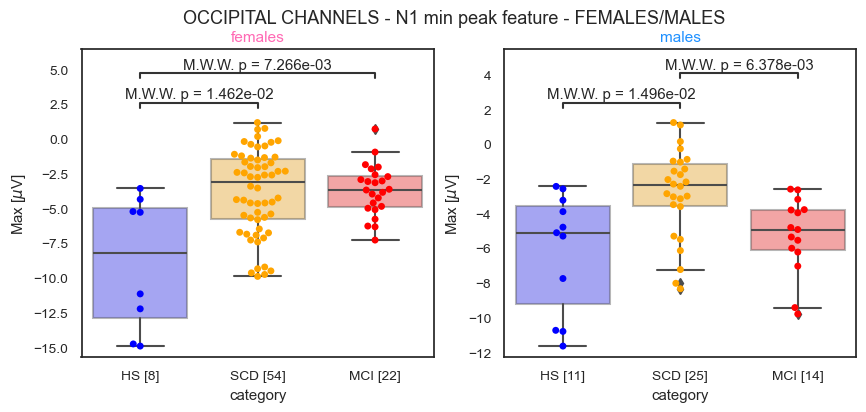

In [26]:
#N1
sns.set_style("white")
palette_box=['blue','orange','red' ]

samples_F=df_GROUPF_OCC_filt[df_GROUPF_OCC_filt["t_window"]==2]#Insert the label (derived from  ERP_feature_extraction) of the temporal window of inetrest for FEMALES
HS_F=len(samples_F[df_GROUPF_OCC_filt["category"] == 'HS'].dropna())
SCD_F=len(samples_F[df_GROUPF_OCC_filt["category"] == 'SCD'].dropna())
MCI_F=len(samples_F[df_GROUPF_OCC_filt["category"] == 'MCI'].dropna())
df_F = samples_F
x_F = "category"
y_F = "min feat"
pairs_F = [("HS", "MCI"), ("HS", "SCD"), ("SCD", "MCI")]

samples_M=df_GROUPM_OCC_filt[df_GROUPM_OCC_filt["t_window"]==0]#Insert the label relative to the same temporal window of interest but for MALES
HS_M=len(samples_M[df_GROUPM_OCC_filt["category"] == 'HS'].dropna())
SCD_M=len(samples_M[df_GROUPM_OCC_filt["category"] == 'SCD'].dropna())
MCI_M=len(samples_M[df_GROUPM_OCC_filt["category"] == 'MCI'].dropna())
df_M = samples_M
x_M = "category"
y_M = "min feat"
pairs_M= [("HS", "MCI"), ("HS", "SCD"), ("SCD", "MCI")]

fig, [ax_F,ax_M] = plt.subplots(1,2, figsize=(10,4))
sns.set(font_scale=0.9)
sns.boxplot(ax=ax_F, data=df_F, x=x_F, y=y_F,palette=palette_box,boxprops=dict(alpha=.4))
sns.swarmplot(ax=ax_F, data=df_F, x=x_F, y=y_F,palette=palette_box)
annot = Annotator(ax_F, pairs_F, data=df_F, x=x_F, y=y_F)
annot.configure(test='Mann-Whitney', comparisons_correction="Bonferroni",
                text_format='full',hide_non_significant=True).apply_test().annotate()
sns.boxplot(ax=ax_M, data=df_M, x=x_M, y=y_M,palette=palette_box,boxprops=dict(alpha=.4))
sns.swarmplot(ax=ax_M, data=df_M, x=x_M, y=y_M,palette=palette_box)
annot = Annotator(ax_M, pairs_M, data=df_M, x=x_M, y=y_M)
annot.configure(test='Mann-Whitney', comparisons_correction="Bonferroni",
                text_format='full',hide_non_significant=True).apply_test().annotate()

ax_F.set_title('females',color='hotpink', fontsize=11 )
ax_M.set_title('males',fontsize=11, color='dodgerblue')
ax_F.set_xticklabels([f'HS [{HS_F}]', f'SCD [{SCD_F}]',f'MCI [{MCI_F}]'])
ax_M.set_xticklabels([f'HS [{HS_M}]', f'SCD [{SCD_M}]',f'MCI [{MCI_M}]'])

ax_F.set_ylabel(f'Max [$\mu$V]')
ax_M.set_ylabel(f'Max [$\mu$V]')

fig.suptitle("OCCIPITAL CHANNELS - N1 min peak feature - FEMALES/MALES ",fontsize=13)

### $\color{grey}{\textsf{SHAP}}$

 $\color{orange}{\textsf{SHAP performed at an exploratory level, a deeper analysis should be required}}$

In [34]:
# N1 - MALES

y = df_GROUPM_OCC_filt['category'][df_GROUPM_OCC_filt['t_window']==0]#Insert the label for the temporal window N1 (derived from ERP_feature_extraction)
X  = df_GROUPM_OCC_filt[['integral feat','min feat']][df_GROUPM_OCC_filt['t_window']==0] 
  
X_train, X_test, y_train, y_test = train_test_split( 
            X, y, test_size = 0.2, random_state = 0) 


In [35]:
#Dummy Classifier

strategies = ['most_frequent', 'stratified', 'uniform', 'constant'] 

from sklearn.metrics import balanced_accuracy_score
  
test_scores = [] 
for s in strategies: 
    if s =='constant': 
        dclf = DummyClassifier(strategy = s, random_state = 0, constant ='SCD') 
    else: 
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test) 
    #score = dclf.score(X_test, y_test)
    score=balanced_accuracy_score(y_test, y_pred) 
    test_scores.append(score)

test_scores

[0.3333333333333333,
 0.16666666666666666,
 0.49999999999999994,
 0.3333333333333333]

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(X_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best Balanced Accuracy: ', grid_search_tree.best_score_)

# get the best model
best_tree = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Best Balanced Accuracy:  0.65


In [30]:
import shap
from matplotlib import colors as plt_colors

  0%|          | 0/11 [00:00<?, ?it/s]

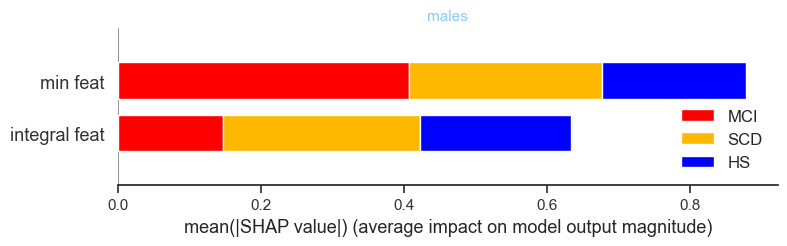

In [38]:
explainer = shap.KernelExplainer(best_tree.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

# class names
classes = ['HS', 'SCD', 'MCI']

# set RGB tuple per class
colors = [(0, 0, 1), (1,0.72,0), (1, 0, 0)]

# get class ordering from shap values
class_inds = np.argsort([-np.abs(shap_values[i]).mean() for i in range(len(shap_values))])

# create listed colormap
cmap = plt_colors.ListedColormap(np.array(colors)[class_inds])

sns.set_style('white')
shap.summary_plot(shap_values, X, color=cmap, class_names=classes,plot_size=[8,2.4],show=False)
plt.title('males',color='lightskyblue', fontsize=11 )
plt.savefig('N1femaleshap.svg',dpi=400)
plt.show()

In [39]:
# N1 - FEMALES

y = df_GROUPF_OCC_filt['category'][df_GROUPF_OCC_filt['t_window']==2]#Insert the label for the temporal window N1 (derived from ERP_feature_extraction)
X  = df_GROUPF_OCC_filt[['integral feat','min feat']][df_GROUPF_OCC_filt['t_window']==2] 
  
X_train, X_test, y_train, y_test = train_test_split( 
            X, y, test_size = 0.2, random_state = 0) 


In [40]:
#Dummy Classifier

strategies = ['most_frequent', 'stratified', 'uniform', 'constant'] 

from sklearn.metrics import balanced_accuracy_score
  
test_scores = [] 
for s in strategies: 
    if s =='constant': 
        dclf = DummyClassifier(strategy = s, random_state = 0, constant ='SCD') 
    else: 
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test) 
    #score = dclf.score(X_test, y_test)
    score=balanced_accuracy_score(y_test, y_pred) 
    test_scores.append(score)

test_scores

[0.3333333333333333,
 0.2905982905982906,
 0.5726495726495726,
 0.3333333333333333]

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(X_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best Balanced Accuracy: ', grid_search_tree.best_score_)

# get the best model
best_tree = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Best Balanced Accuracy:  0.6418518518518519


  0%|          | 0/18 [00:00<?, ?it/s]

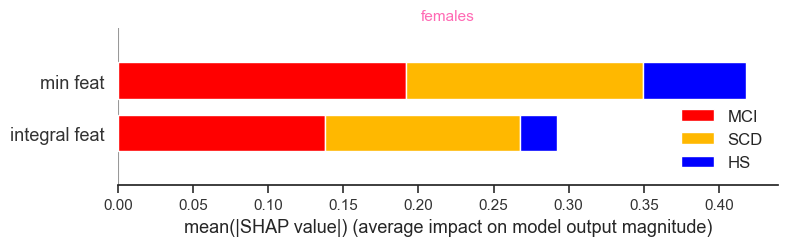

In [42]:
explainer = shap.KernelExplainer(best_tree.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

# class names
classes = ['HS', 'SCD', 'MCI']

# set RGB tuple per class
colors = [(0, 0, 1), (1,0.72,0), (1, 0, 0)]

# get class ordering from shap values
class_inds = np.argsort([-np.abs(shap_values[i]).mean() for i in range(len(shap_values))])

# create listed colormap
cmap = plt_colors.ListedColormap(np.array(colors)[class_inds])

sns.set_style('white')
shap.summary_plot(shap_values, X, color=cmap, class_names=classes,plot_size=[8,2.4],show=False)
plt.title('females',color='hotpink', fontsize=11 )
plt.savefig('N1femaleshap.svg',dpi=400)
plt.show()

### $\color{grey}{\textsf{Additional plot: how sex modulates features}}$

Text(0.5, 0.98, 'OCCIPITAL CHANNELS - N1 min peak feature - FEMALES/MALES ')

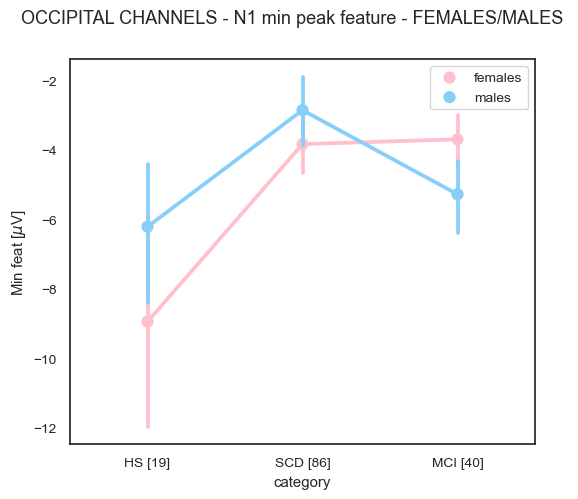

In [56]:
y_F=df_GROUPF_OCC_filt['min feat'][df_GROUPF_OCC_filt["t_window"] == 2]
y_M=df_GROUPM_OCC_filt['min feat'][df_GROUPM_OCC_filt["t_window"] == 0]

fig, ax = plt.subplots(1,1, figsize=(6,5))
plot1=sns.pointplot(ax=ax,data=df_GROUPF_OCC_filt, x='category', y=y_F, color='pink',label='females')
plot2=sns.pointplot(ax=ax,data=df_GROUPM_OCC_filt, x='category', y=y_M,color='lightskyblue',label='males')

ax.legend()
ax.set_xticklabels([f'HS [19]', f'SCD [86]',f'MCI [40]'])
ax.set_ylabel(f'Min feat [$\mu$V]')
fig.suptitle("OCCIPITAL CHANNELS - N1 min peak feature - FEMALES/MALES ",fontsize=13)


Text(0.5, 0.98, 'OCCIPITAL CHANNELS - P1 max peak feature - FEMALES/MALES ')

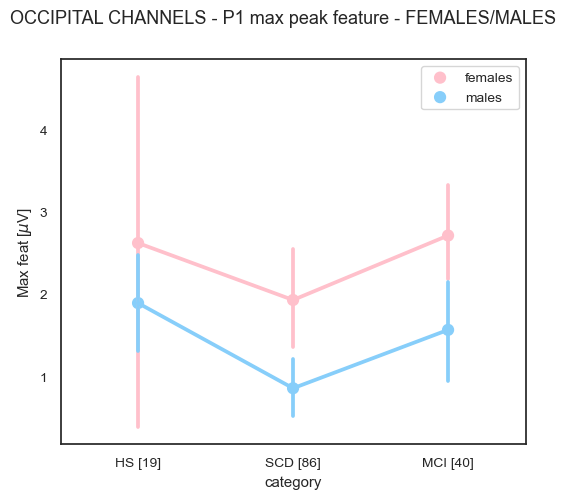

In [57]:
y_F=df_GROUPF_OCC_filt['max feat'][df_GROUPF_OCC_filt["t_window"] == 0]
y_M=df_GROUPM_OCC_filt['max feat'][df_GROUPM_OCC_filt["t_window"] == 2]

fig, ax = plt.subplots(1,1, figsize=(6,5))
plot1=sns.pointplot(ax=ax,data=df_GROUPF_OCC_filt, x='category', y=y_F, color='pink',label='females')
plot2=sns.pointplot(ax=ax,data=df_GROUPM_OCC_filt, x='category', y=y_M,color='lightskyblue',label='males')

ax.legend()
ax.set_xticklabels([f'HS [19]', f'SCD [86]',f'MCI [40]'])
ax.set_ylabel(f'Max feat [$\mu$V]')
fig.suptitle("OCCIPITAL CHANNELS - P1 max peak feature - FEMALES/MALES ",fontsize=13)